<a href="https://colab.research.google.com/github/skyflown/2024-1-BDA/blob/main/inclass/Bigdata_work_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 20222595 김수진

### 파이썬 설치 확인

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


### 코랩에서 한글 처리

In [ ]:
!pip install koreanize_matplotlib

### 그래프 설정

In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [ ]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

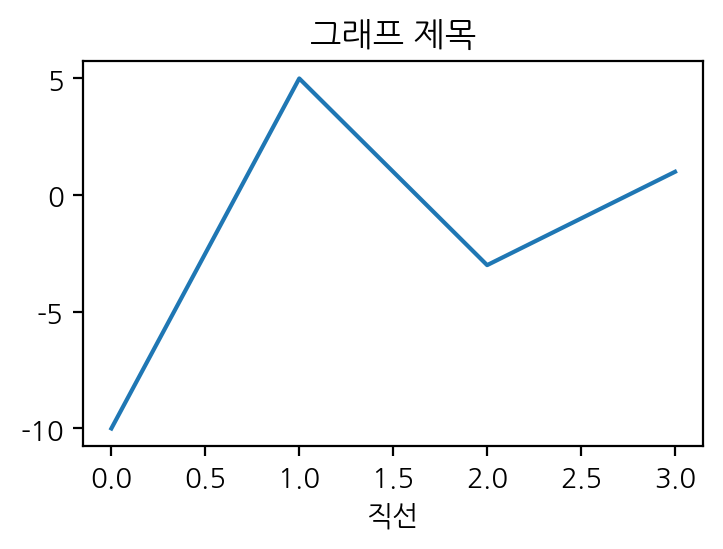

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 1. 타이타닉 데이터 분석 발표

1. Q. 성별에 따른 생존도 차이
2. Q. 나이에 따른 생존도 차이
3. Q. 좌석별 생존도 차이
4. 성별, 나이 좌석에 따른 생존도 차이




#### 데이터 불러오기

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.shape # 행, 열 개수 출력

(891, 15)

In [ ]:
titanic.info() # 변수 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe() # 요약 통계량

,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


## Q. 성별에 따른 생존도 차이

## 성별 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
titanic['sex'].dtypes # 변수 타입 출력

dtype('O')

In [ ]:
titanic['sex'].value_counts()  # 빈도 구하기

sex
male      577
female    314
Name: count, dtype: int64

#### 2. 전처리하기

In [ ]:
# 이상치 확인
titanic['sex'].describe()

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

In [ ]:
# 결측치 확인
titanic['sex'].isna().sum()

0

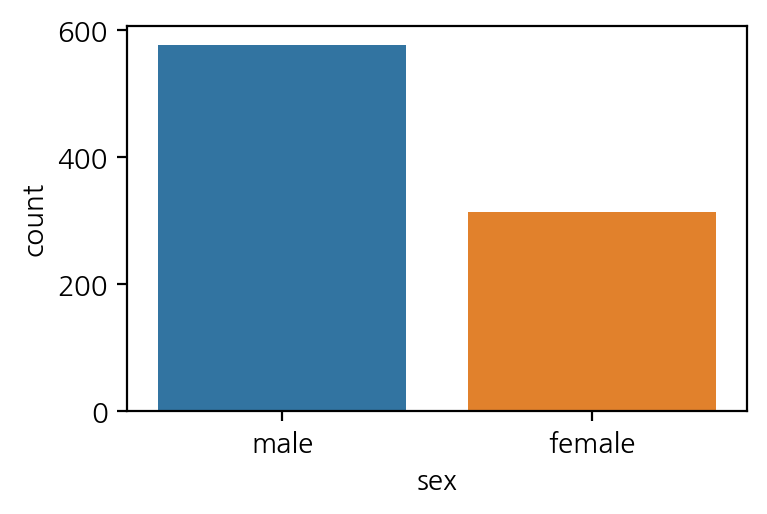

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = titanic, x = 'sex', hue='sex');

## 생존 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
titanic['survived'].dtypes  # 변수 타입 출력

dtype('int64')

In [ ]:
titanic['survived'].value_counts()  # 빈도 구하기

survived
0    549
1    342
Name: count, dtype: int64

## 2. 전처리하기

In [ ]:
# 이상치 확인
titanic['survived'].describe()

count    891.00
mean       0.38
std        0.49
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: survived, dtype: float64

In [ ]:
# 결측치 확인
titanic['survived'].isna().sum()

0

In [ ]:
# 성별 항목 이름 부여
titanic['survived'] = np.where(titanic['survived'] == 1, 'survived', 'died')

# 빈도 구하기
titanic['survived'].value_counts()

survived
died        549
survived    342
Name: count, dtype: int64

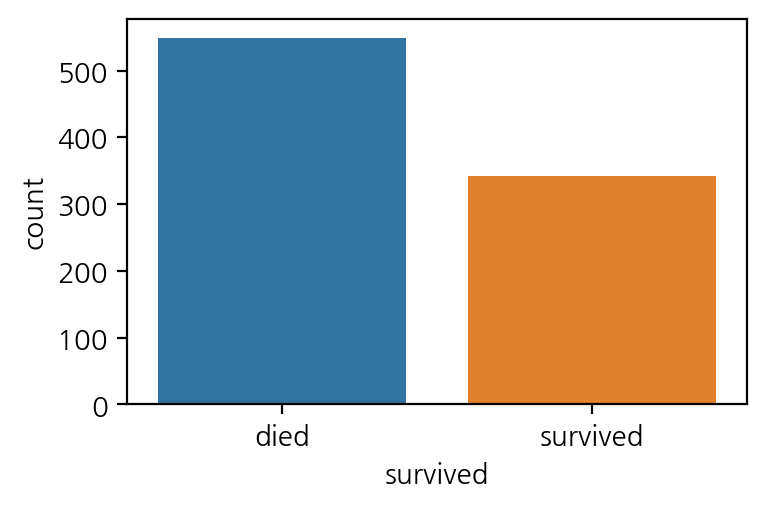

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = titanic, x = 'survived', hue = 'survived');

## 성별에 따른 생존도 분석하기

In [ ]:
# sex별 분리, survived 추출, 비율 구하기
sex_survived = titanic.groupby('sex', as_index = False)['survived'].value_counts(normalize = True)
sex_survived

,sex,survived,proportion
0,female,survived,0.74
1,female,died,0.26
2,male,died,0.81
3,male,survived,0.19


In [ ]:
# 백분율로 바꾸기
# 반올림
sex_survived = sex_survived.assign(proportion = sex_survived['proportion'] * 100).round(1)
sex_survived

,sex,survived,proportion
0,female,survived,74.2
1,female,died,25.8
2,male,died,81.1
3,male,survived,18.9


<Axes: xlabel='proportion', ylabel='sex'>

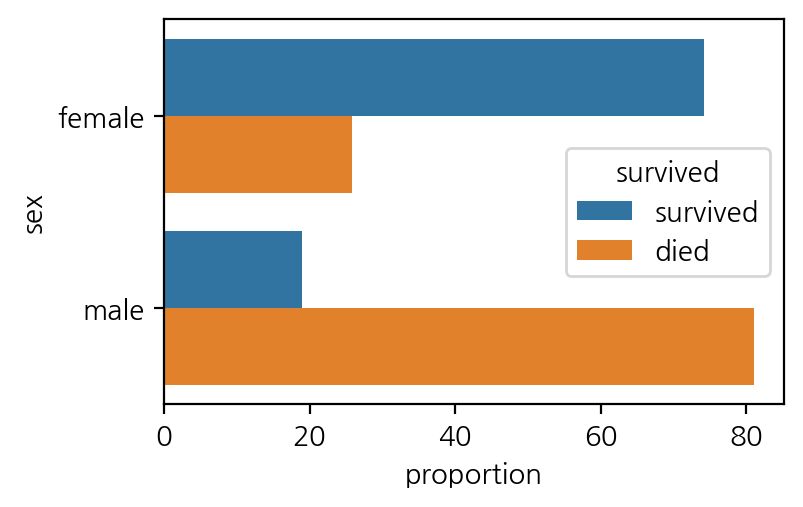

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = sex_survived, x = 'proportion', y = 'sex', hue = 'survived')

## Q. 나이에 따른 생존도 차이

## 나이 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
titanic['age'].dtypes # 변수 타입 출력

dtype('float64')

In [ ]:
titanic['age'].describe() # 요약 통계량 구하기

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

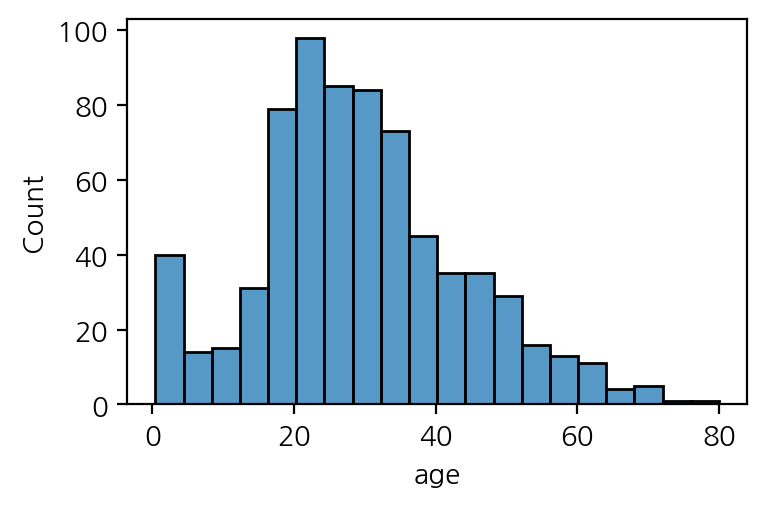

In [ ]:
sns.histplot(titanic, x = 'age')

## 2. 전처리하기

In [ ]:
# 결측치 확인
titanic['age'].isna().sum()

177

In [ ]:
# 결측치가 있는 모든 행 제거
titanic.dropna(subset=['age'], inplace=True)

In [ ]:
titanic['age_group'] = np.where(titanic['age'] < 20, 'non_adult', np.where((titanic['age'] >= 20) & (titanic['age'] < 65), 'adult', 'old'))
titanic['age_group'].value_counts()

age_group
adult        539
non_adult    164
old           11
Name: count, dtype: int64

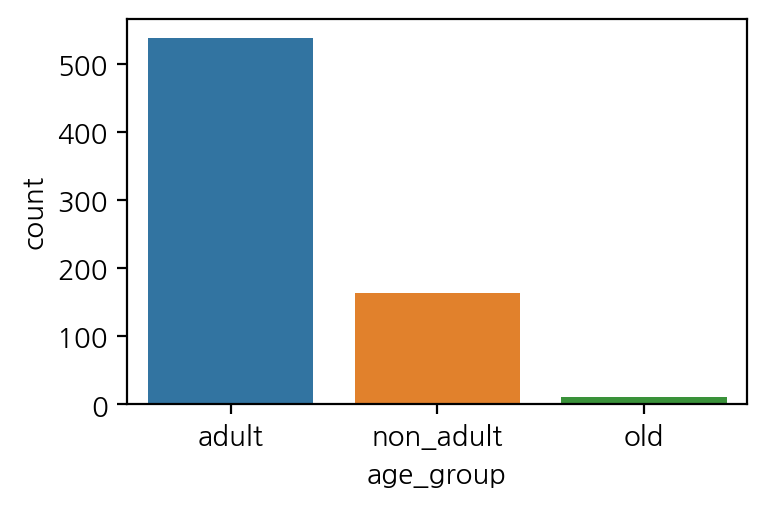

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = titanic, x = 'age_group', hue = 'age_group');

## 나이에 따른 생존도 분석하기

In [ ]:
# age_group별 분리, survived 추출, 비율 구하기
age_survived = titanic.groupby('age_group', as_index = False)['survived'].value_counts(normalize = True)
age_survived

,age_group,survived,proportion
0,adult,died,0.61
1,adult,survived,0.39
2,non_adult,died,0.52
3,non_adult,survived,0.48
4,old,died,0.91
5,old,survived,0.09


In [ ]:
# 백분율로 바꾸기
# 반올림
age_survived = age_survived.assign(proportion = age_survived['proportion'] * 100).round(1)
age_survived

,age_group,survived,proportion
0,adult,died,61.0
1,adult,survived,39.0
2,non_adult,died,51.8
3,non_adult,survived,48.2
4,old,died,90.9
5,old,survived,9.1


<Axes: xlabel='proportion', ylabel='age_group'>

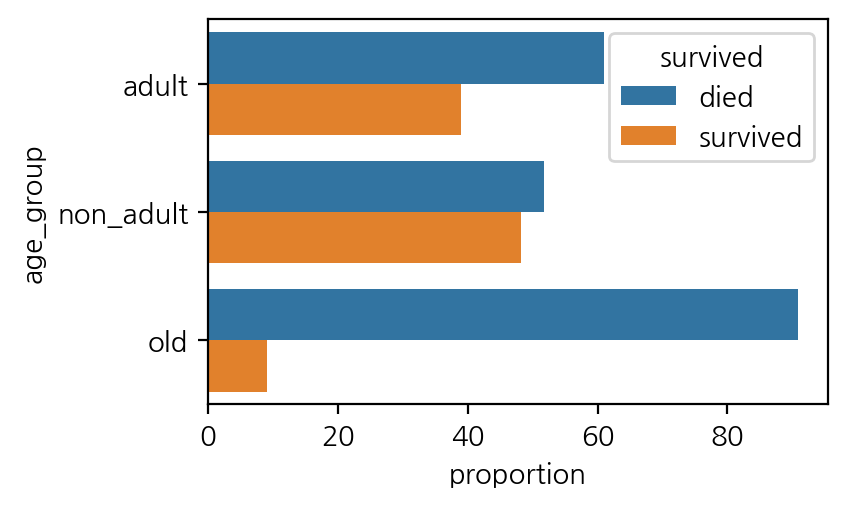

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = age_survived, x = 'proportion', y = 'age_group', hue = 'survived')

## Q. 좌석별 생존도 차이

## 좌석 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
titanic['class'].dtypes # 변수 타입 출력

CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=False)

In [ ]:
titanic['class'].value_counts() # 빈도 구하기

class
Third     355
First     186
Second    173
Name: count, dtype: int64

#### 2. 전처리하기

In [ ]:
titanic['class'].describe() # 요약 통계량 구하기

count       714
unique        3
top       Third
freq        355
Name: class, dtype: object

<Axes: xlabel='class', ylabel='count'>

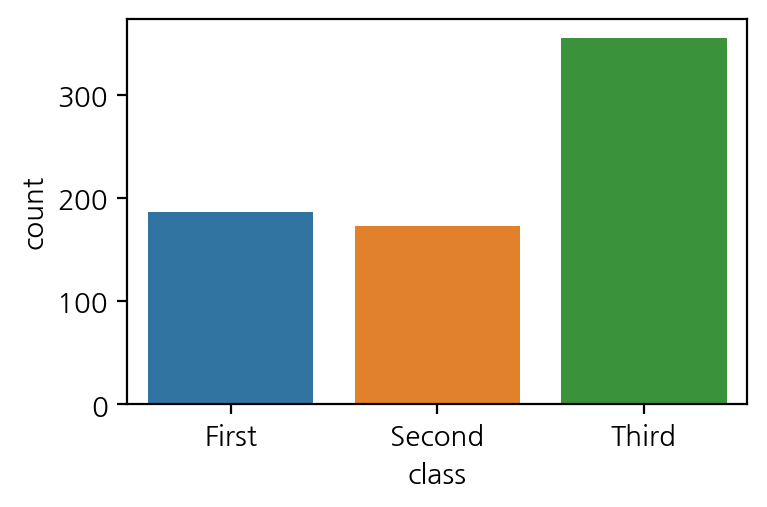

In [ ]:
sns.countplot(titanic, x='class', hue='class')

In [ ]:
# 결측치 확인
titanic['class'].isna().sum()

0

## 좌석별 생존도 분석하기

In [ ]:
# class별 분리, survived 추출, 비율 구하기
class_survived = titanic.groupby('class', as_index = False)['survived'].value_counts(normalize = True)
class_survived

,class,survived,proportion
0,First,survived,0.66
1,First,died,0.34
2,Second,died,0.52
3,Second,survived,0.48
4,Third,died,0.76
5,Third,survived,0.24


In [ ]:
# 백분율로 바꾸기
# 반올림
class_survived = class_survived.assign(proportion = class_survived['proportion'] * 100).round(1)
class_survived

,class,survived,proportion
0,First,survived,65.6
1,First,died,34.4
2,Second,died,52.0
3,Second,survived,48.0
4,Third,died,76.1
5,Third,survived,23.9


<Axes: xlabel='proportion', ylabel='class'>

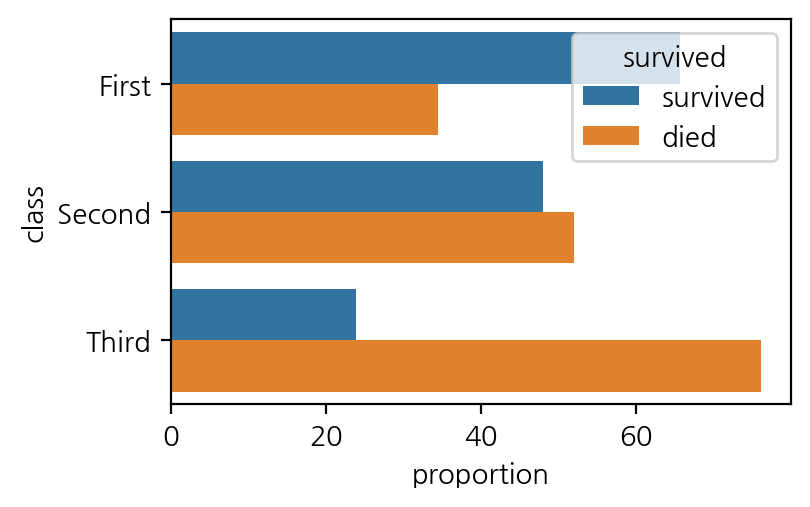

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = class_survived, x = 'proportion', y = 'class', hue = 'survived')

## 성별, 나이, 좌석에 따른 생존도 차이

In [ ]:
who_survived = titanic.groupby('age_group', as_index = False)[['survived', 'sex']].value_counts(normalize = True)
who_survived

,age_group,survived,sex,proportion
0,adult,died,male,0.53
1,adult,survived,female,0.27
2,adult,survived,male,0.12
3,adult,died,female,0.08
4,non_adult,died,male,0.38
5,non_adult,survived,female,0.32
6,non_adult,survived,male,0.16
7,non_adult,died,female,0.13
8,old,died,male,0.91
9,old,survived,male,0.09


## 2. 공공 데이터 분석 발표

## 공공 데이터 자료 출처: https://www.data.go.kr/data/15054738/fileData.do#/tab-layer-file

## 2. 경찰청 서울특별시경찰청_경찰서별 5대범죄 발생 검거 현황_20221231 데이터 분석 발표
#### 1. Q. 범죄 유형별 발생 빈도 알아보기
#### 2. Q. 지역별 발생 빈도 알아보기
#### 3. Q. 범죄 유형별 검거 비율 알아보기

In [ ]:
!pip install chardet

In [ ]:
import chardet
import pandas as pd

# 파일 경로 지정
file_path = 'crime.csv'

# 파일의 인코딩 감지
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

# 감지된 인코딩 확인
encoding = result['encoding']
print(f"Detected encoding: {encoding}")

# 데이터프레임으로 읽기
crime = pd.read_csv(file_path, encoding=encoding)

crime.head()

Detected encoding: EUC-KR


,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,2
2,중부,강도,발생,3
3,중부,강도,검거,2
4,중부,"강간,추행",발생,137


In [ ]:
crime.shape # 행, 열 개수 출력

(310, 4)

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


#### Q. 범죄 유형별 반생 빈도 알아보기

## 범죄 유형 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
crime['죄종'].dtypes # 변수 타입 출력

dtype('O')

In [ ]:
crime['죄종'].describe()

count     310
unique      6
top        살인
freq       62
Name: 죄종, dtype: object

#### 2. 전처리하기

In [ ]:
# 결측치 확인
crime['죄종'].isna().sum()

0

In [ ]:
crime['죄종'].value_counts() # 빈도 구하기

죄종
살인       62
강도       62
절도       62
폭력       62
강간,추행    52
강간       10
Name: count, dtype: int64

<Axes: xlabel='죄종', ylabel='count'>

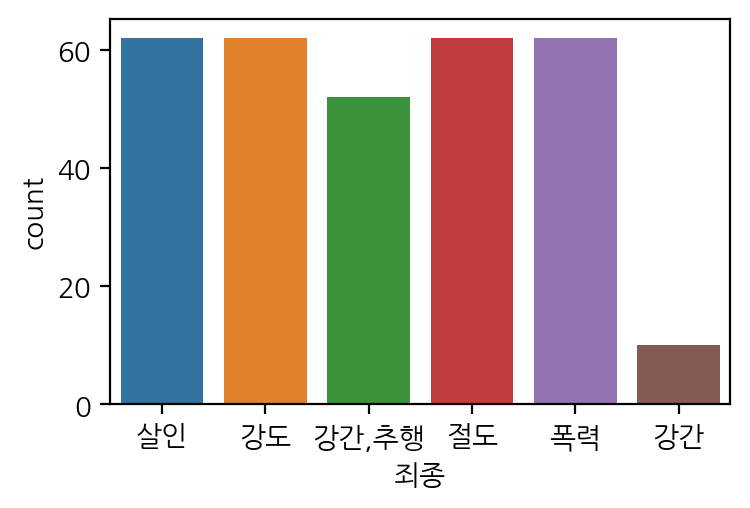

In [ ]:
sns.countplot(crime, x='죄종', hue='죄종')

## 발생 빈도 변수 점토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
crime['건수'].dtypes # 변수 타입 출력

dtype('int64')

In [ ]:
crime['건수'].describe()

count     310.00
mean      497.85
std       663.49
min         0.00
25%         3.00
50%       143.00
75%       840.50
max      2669.00
Name: 건수, dtype: float64

#### 2. 전처리하기

In [ ]:
# 결측치 확인
crime['건수'].isna().sum()

0

#### 범죄 유형별 발생 빈도 분석하기

In [ ]:
# 범죄 유형별 분리, '건수' 추출, 비율 구하기
kind_count = crime.groupby('죄종', as_index = False)['건수'].sum()
kind_count

,죄종,건수
0,강간,724
1,"강간,추행",9628
2,강도,228
3,살인,199
4,절도,57468
5,폭력,86088


In [ ]:
# 전체 건수 합계 계산
total_count = kind_count['건수'].sum()

In [ ]:
# 죄종별 건수의 비율 계산
kind_count['prop'] = (kind_count['건수'] / total_count) * 100
kind_count

,죄종,건수,prop
0,강간,724,0.47
1,"강간,추행",9628,6.24
2,강도,228,0.15
3,살인,199,0.13
4,절도,57468,37.24
5,폭력,86088,55.78


<Axes: xlabel='prop', ylabel='죄종'>

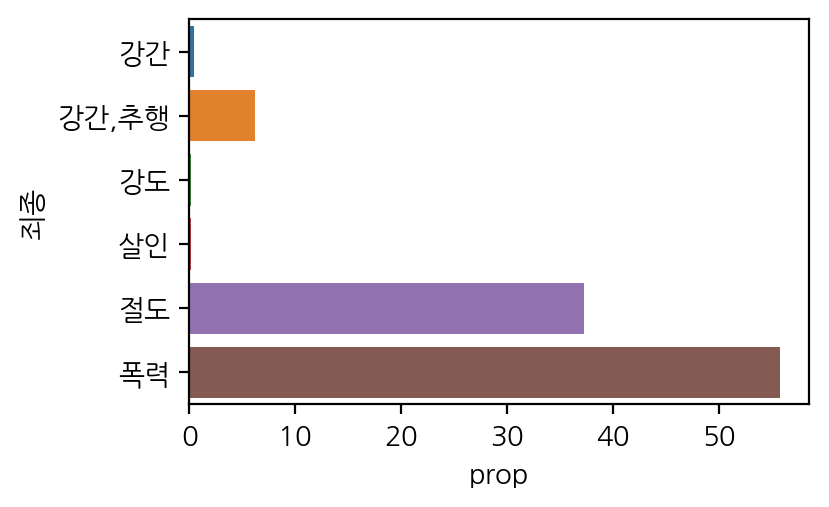

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = kind_count, x = 'prop', y = '죄종', hue='죄종')

## Q. 지역별 범죄 유형별 발생 빈도 알아보기

## 지역 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
crime['구분'].dtypes # 변수 타입 출력

dtype('O')

In [ ]:
crime['구분'].describe()

count     310
unique     31
top        중부
freq       10
Name: 구분, dtype: object

In [ ]:
crime['구분'].value_counts() # 빈도 구하기

구분
중부     10
중랑     10
도봉     10
은평     10
방배     10
노원     10
송파     10
양천     10
서초     10
구로     10
종암     10
강동     10
강서     10
관악     10
강남     10
금천     10
종로     10
강북     10
서부     10
광진     10
동작     10
성동     10
영등포    10
마포     10
동대문    10
성북     10
용산     10
혜화     10
서대문    10
남대문    10
수서     10
Name: count, dtype: int64

#### 2. 전처리하기

In [ ]:
# 결측치 확인
crime['구분'].isna().sum()

0

## 지역별 발생 빈도 분석하기

In [ ]:
# 지역별 분리, 발생 빈도 추출, 비율 구하기
where_count = crime.groupby('구분', as_index = False)['건수'].sum()
where_count

,구분,건수
0,강남,7736
1,강동,6355
2,강북,5175
3,강서,8254
4,관악,8290
5,광진,6117
6,구로,6589
7,금천,4464
8,남대문,1724
9,노원,6537


In [ ]:
# 전체 건수 합계 계산
total_count = where_count['건수'].sum()

In [ ]:
# 죄종별 건수의 비율 계산
where_count['prop'] = (where_count['건수'] / total_count) * 100
where_count

,구분,건수,prop
0,강남,7736,5.01
1,강동,6355,4.12
2,강북,5175,3.35
3,강서,8254,5.35
4,관악,8290,5.37
5,광진,6117,3.96
6,구로,6589,4.27
7,금천,4464,2.89
8,남대문,1724,1.12
9,노원,6537,4.24


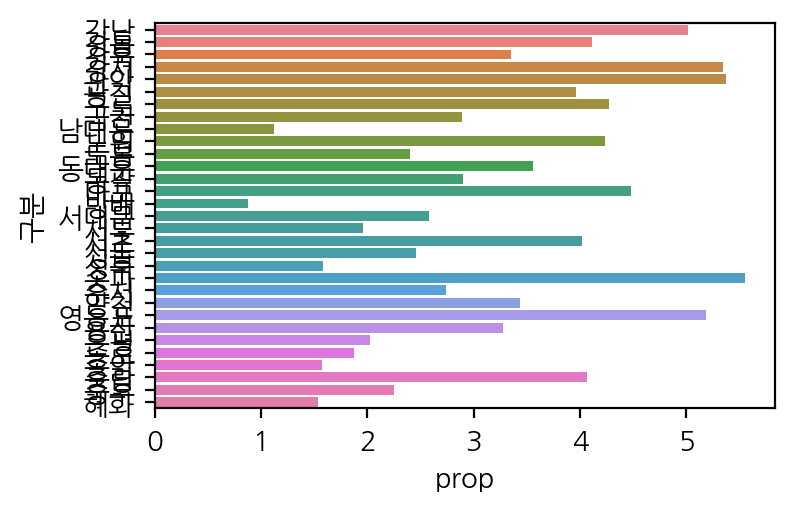

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = where_count, x = 'prop', y = '구분', hue='구분')
plt.figure(figsize=(10, 6));

## Q. 범죄 유형별 검거율 알아보기

## 검거 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
crime['발생검거'].dtypes # 변수 타입 출력

dtype('O')

In [ ]:
crime['발생검거'].describe()

count     310
unique      2
top        발생
freq      155
Name: 발생검거, dtype: object

In [ ]:
crime_count = crime['발생검거'].value_counts()
crime_count

발생검거
발생    155
검거    155
Name: count, dtype: int64

#### 2. 전처리하기

In [ ]:
# 결측치 확인
crime['발생검거'].isna().sum()

0

## 범죄 유형별 검거율 분석하기

In [ ]:
# 범죄 유형, '발생검거' 그룹화, 건수 합산, 비율 구하기
kind_catch_count = crime.groupby(['죄종','발생검거'], as_index=False)['건수'].sum()
kind_catch_count

,죄종,발생검거,건수
0,강간,검거,321
1,강간,발생,403
2,"강간,추행",검거,4215
3,"강간,추행",발생,5413
4,강도,검거,111
5,강도,발생,117
6,살인,검거,95
7,살인,발생,104
8,절도,검거,19889
9,절도,발생,37579


In [ ]:
happen_total_count = crime['건수'].sum()
happen_total_count

154335

In [ ]:
kind_catch_count['prop'] = (kind_catch_count['건수'] / happen_total_count) * 100
kind_catch_count

,죄종,발생검거,건수,prop
0,강간,검거,321,0.21
1,강간,발생,403,0.26
2,"강간,추행",검거,4215,2.73
3,"강간,추행",발생,5413,3.51
4,강도,검거,111,0.07
5,강도,발생,117,0.08
6,살인,검거,95,0.06
7,살인,발생,104,0.07
8,절도,검거,19889,12.89
9,절도,발생,37579,24.35


<Axes: xlabel='prop', ylabel='죄종'>

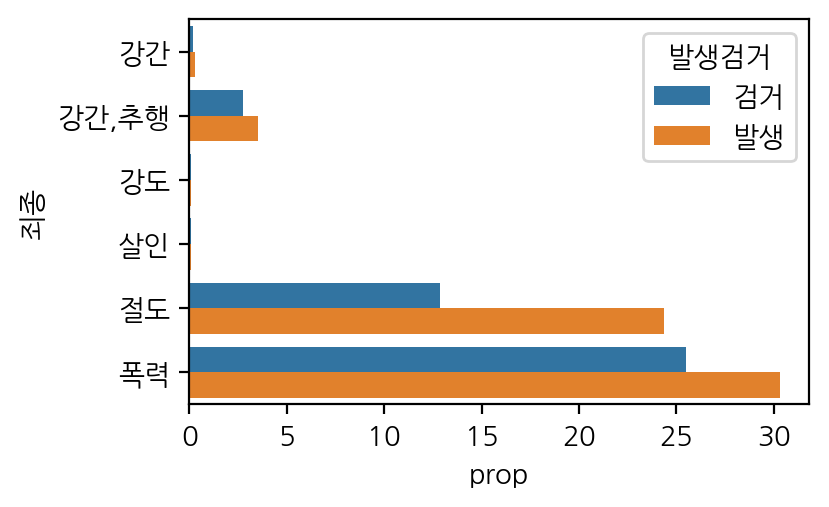

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = kind_catch_count, x = 'prop', y = '죄종', hue='발생검거')